In [2]:
%matplotlib inline

import pandas as pd
from xgboost import XGBClassifier
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
import os

In [3]:
# Read the training data
df_train = pd.read_csv('/home/ec2-user/Notebooks/seis735/data/train_freq.gz', compression='gzip', encoding='ISO-8859-1')
df_test = pd.read_csv('/home/ec2-user/Notebooks/seis735/data/test_freq.gz', compression='gzip', encoding='ISO-8859-1')

In [4]:
# Keep only the predictors
df_train.drop(['ID','Gene','Variation'], inplace=True, axis=1)

# Convert predictors to matrix format
x_train = sparse.csr_matrix(df_train.as_matrix()[:,1:])
y_train = df_train.as_matrix()[:,0]

# Cleanup
del df_train

In [5]:
# Keep only the predictors
df_test.drop(['ID','Gene','Variation'], inplace=True, axis=1)

# Convert predictors to matrix format
x_test = sparse.csr_matrix(df_test.as_matrix()[:,1:])
y_test = df_test.as_matrix()[:,0]

# Cleanup
del df_test

In [6]:
# Train the model
svd = TruncatedSVD(n_components=1000, n_iter=50, random_state=42)
svd.fit(x_train)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=50,
       random_state=42, tol=0.0)

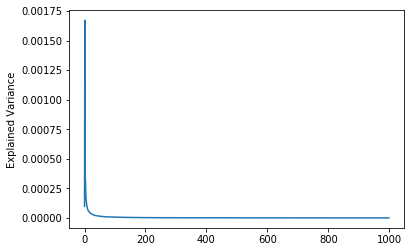

In [7]:
# Get the explained variance
var = svd.explained_variance_

# Plot the variance
plt.plot(var)
plt.ylabel('Explained Variance')
plt.show()

In [8]:
# Transform the data (reduce the dimensions)
x_train_red = svd.transform(x_train)
x_test_red = svd.transform(x_test)

In [9]:
# Initialize the model parameters
xgb = XGBClassifier(learning_rate=0.1,
                    max_depth=2,
                    n_estimators=2000,
                    objective='multi:softprob',
                    eval_metric='mlogloss',
                    num_class=9,
                    n_jobs=-1
                    )

# Train the model
xgb.fit(x_train_red,
        y_train,
        verbose=True,
        early_stopping_rounds=50,
        eval_set=[(x_train_red, y_train), (x_test_red, y_test)]
        )

[0]	validation_0-mlogloss:2.09569	validation_1-mlogloss:2.11159
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 50 rounds.
[1]	validation_0-mlogloss:2.0136	validation_1-mlogloss:2.04295
[2]	validation_0-mlogloss:1.94335	validation_1-mlogloss:1.98019
[3]	validation_0-mlogloss:1.88281	validation_1-mlogloss:1.92819
[4]	validation_0-mlogloss:1.82956	validation_1-mlogloss:1.88266
[5]	validation_0-mlogloss:1.77978	validation_1-mlogloss:1.83948
[6]	validation_0-mlogloss:1.73645	validation_1-mlogloss:1.80197
[7]	validation_0-mlogloss:1.6936	validation_1-mlogloss:1.76171
[8]	validation_0-mlogloss:1.65762	validation_1-mlogloss:1.72888
[9]	validation_0-mlogloss:1.6244	validation_1-mlogloss:1.70082
[10]	validation_0-mlogloss:1.59227	validation_1-mlogloss:1.67246
[11]	validation_0-mlogloss:1.5643	validation_1-mlogloss:1.64897
[12]	validation_0-mlogloss:1.53875	validation_1-mlogloss:1.63001
[1

[123]	validation_0-mlogloss:0.757155	validation_1-mlogloss:1.137
[124]	validation_0-mlogloss:0.754571	validation_1-mlogloss:1.13633
[125]	validation_0-mlogloss:0.751857	validation_1-mlogloss:1.13583
[126]	validation_0-mlogloss:0.749007	validation_1-mlogloss:1.13611
[127]	validation_0-mlogloss:0.746244	validation_1-mlogloss:1.13477
[128]	validation_0-mlogloss:0.743546	validation_1-mlogloss:1.13412
[129]	validation_0-mlogloss:0.740936	validation_1-mlogloss:1.13401
[130]	validation_0-mlogloss:0.738436	validation_1-mlogloss:1.1328
[131]	validation_0-mlogloss:0.735654	validation_1-mlogloss:1.13199
[132]	validation_0-mlogloss:0.733241	validation_1-mlogloss:1.13224
[133]	validation_0-mlogloss:0.73058	validation_1-mlogloss:1.13116
[134]	validation_0-mlogloss:0.727989	validation_1-mlogloss:1.13079
[135]	validation_0-mlogloss:0.725245	validation_1-mlogloss:1.13029
[136]	validation_0-mlogloss:0.722461	validation_1-mlogloss:1.13022
[137]	validation_0-mlogloss:0.720072	validation_1-mlogloss:1.12963

[246]	validation_0-mlogloss:0.521839	validation_1-mlogloss:1.11379
[247]	validation_0-mlogloss:0.520457	validation_1-mlogloss:1.11396
[248]	validation_0-mlogloss:0.519011	validation_1-mlogloss:1.11383
[249]	validation_0-mlogloss:0.517593	validation_1-mlogloss:1.1144
[250]	validation_0-mlogloss:0.516256	validation_1-mlogloss:1.11398
[251]	validation_0-mlogloss:0.514919	validation_1-mlogloss:1.11415
[252]	validation_0-mlogloss:0.513606	validation_1-mlogloss:1.1142
[253]	validation_0-mlogloss:0.512322	validation_1-mlogloss:1.11359
[254]	validation_0-mlogloss:0.511202	validation_1-mlogloss:1.11266
[255]	validation_0-mlogloss:0.509888	validation_1-mlogloss:1.11311
[256]	validation_0-mlogloss:0.508562	validation_1-mlogloss:1.11333
[257]	validation_0-mlogloss:0.507388	validation_1-mlogloss:1.11311
[258]	validation_0-mlogloss:0.506229	validation_1-mlogloss:1.11287
[259]	validation_0-mlogloss:0.504984	validation_1-mlogloss:1.11275
[260]	validation_0-mlogloss:0.503903	validation_1-mlogloss:1.112

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='mlogloss', gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=2000, n_jobs=-1,
       nthread=None, num_class=9, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)